## **GRIP** - The Sparks Foundation // Data Science and Business Anaytics Internship

# Explanatory Data Analysis - Retail
Author: Rupali Jain


13 November, 2020 



##### Problem Statement
Perform Explanatory Data Analysis on the provided dataset 'SampleSuperstore', and derive trends and meaningful inisghts from them.

__________________


##### Introduction
The dataset 'SampleSuperstore' comprises of sales data for a store in United States. The goal is to explore the dataset to find business problems analysing the trends. As a business manager, need to find our weak areas to make more profit.

___________________________________

### Data and Setup

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in the csv data file as a dataframe

In [4]:
data=pd.read_csv('SampleSuperstore.csv')

In [32]:
data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200



### General Exploration of dataset

In [6]:
#drop unnecessary columns
data.drop('Country',axis='columns',inplace=True) 
data.drop('Postal Code',axis='columns',inplace=True) 

In [7]:
data.head()
#will show first five rows of the dataset

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
data.columns
#display all columns in the dataset

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
data.shape
#dgives number of rows, number of columns

(9994, 11)

In [10]:
data.info()
#General information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [11]:
data.isnull().sum()
#to check if there are any null values in dataset

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

---
### Overview - Basic analysis 

In [29]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


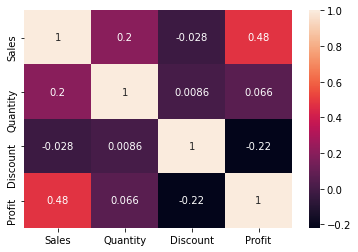

In [28]:
sns.heatmap(data.corr(),annot=True)

>From above data, we can see that;
1. Quantity and Sales are directly proportional.
2. Sales and Profits are directly proportional.
3. Discount is directlt proportional to Quantity of sales.
4. However, Discount is negatively correlated to Sales and Profits.

In [30]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


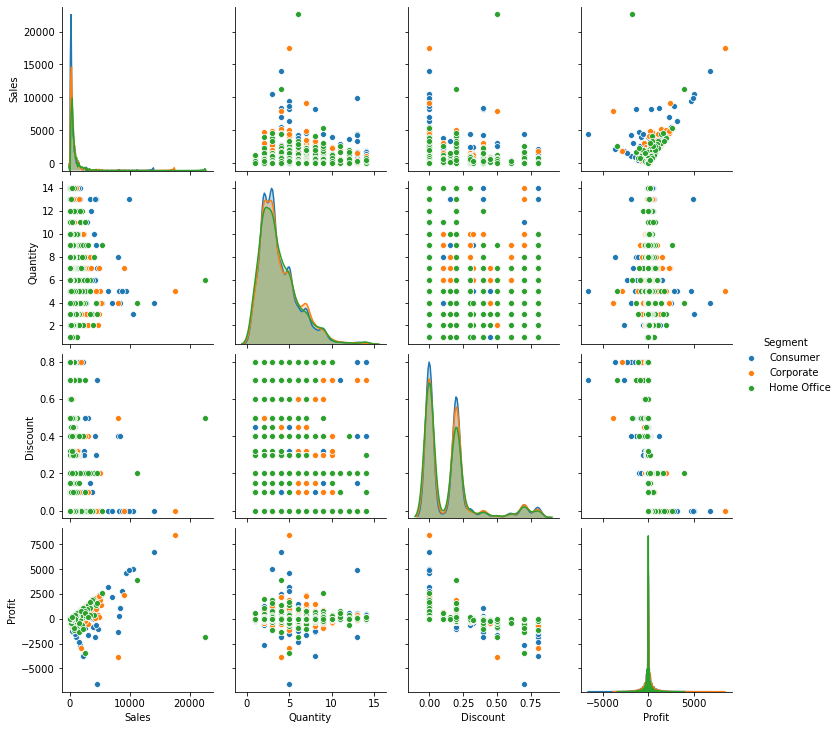

In [23]:
sns.pairplot(data,hue='Segment')

---
### Categorical analysis by count

#### Ship Mode

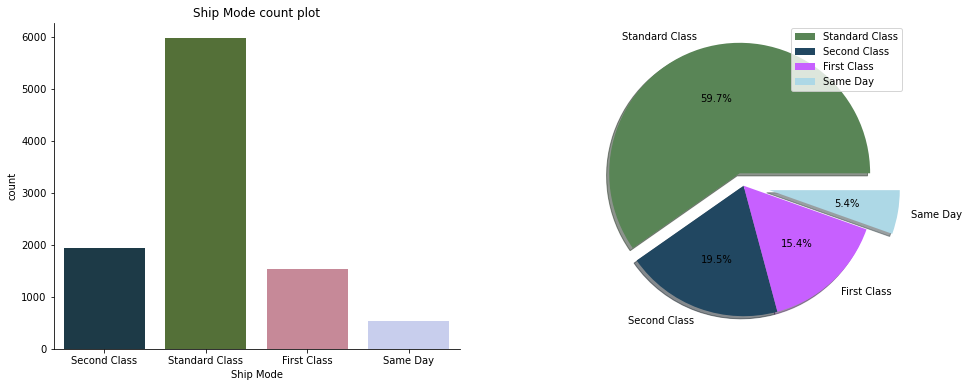

In [235]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Ship Mode',data=data,palette='cubehelix')
plt.title('Ship Mode count plot')
sns.despine()


shipmodecounts=data['Ship Mode'].value_counts()
plt.subplot(1,2,2)
plt.pie(shipmodecounts,labels=shipmodecounts.index,shadow=True,colors=['#598556','#214761','#c760ff','lightblue'],explode=[0.1,0,0,0.2],autopct='%1.1f%%')
plt.legend()

>Highest number of customers opt for Standard class ship mode, least number of customers opt for same day ship mode.

#### Customer Segment

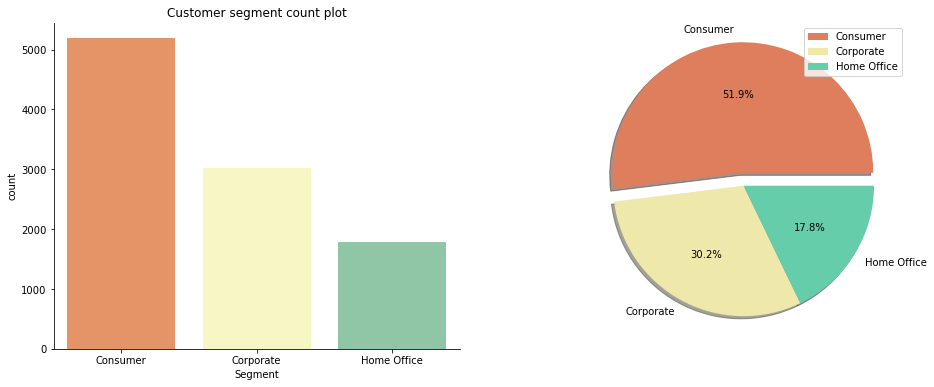

In [248]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Segment',data=data,palette='Spectral')
plt.title('Customer segment count plot')
sns.despine()

segmentcounts=data['Segment'].value_counts()
plt.subplot(1,2,2)
plt.pie(segmentcounts,labels=segmentcounts.index,colors=['#de7e5d','palegoldenrod','mediumaquamarine'],shadow=True,explode=[0.1,0,0],autopct='%1.1f%%')
plt.legend()

>We have highest number of buyers in the Consumer segment, as compared to Corporate or Home office. Thus Consumers are our most potential buyers.

#### Region

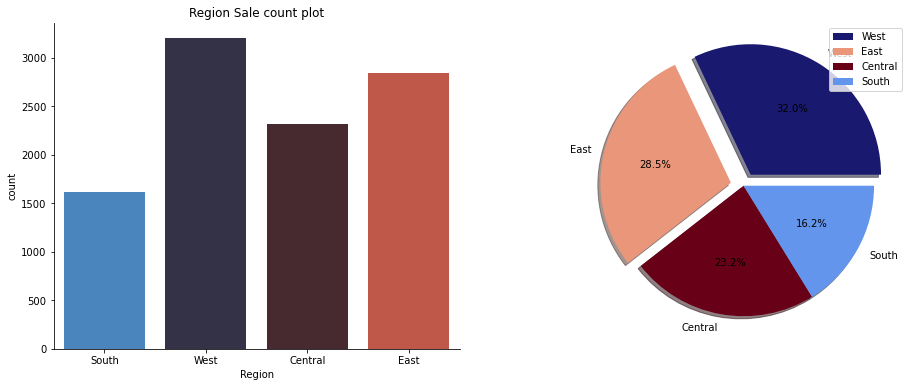

In [282]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Region',data=data,palette='icefire')
plt.title('Region Sale count plot')
sns.despine()

regioncount=data['Region'].value_counts()
plt.subplot(1,2,2)
plt.pie(regioncount,labels=regioncount.index,shadow=True,colors=['midnightblue','darksalmon','#680018','cornflowerblue'],explode=[0.1,0.1,0,0],autopct='%1.1f%%')
plt.legend()

>From above plots we infer that West and East region considerably contribute to our sales. We need to work on South region to increase our revenue.

#### Product Category

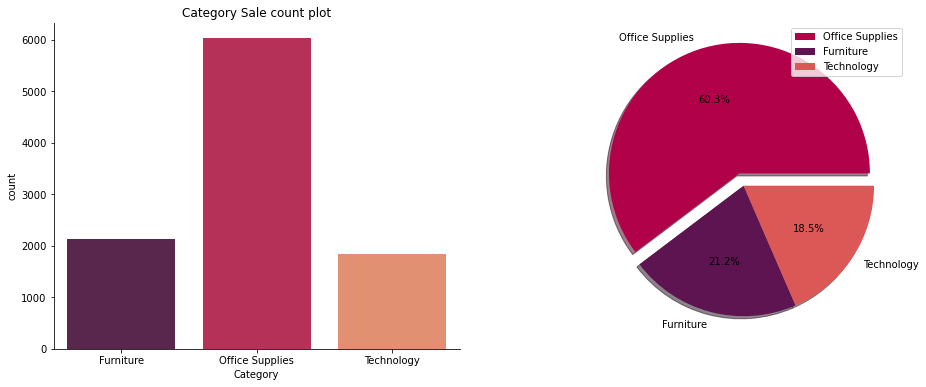

In [311]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Category',data=data,palette='rocket')
plt.title('Category Sale count plot')
sns.despine()

categorycounts=data['Category'].value_counts()
plt.subplot(1,2,2)
plt.pie(categorycounts,labels=categorycounts.index,shadow=True,colors=['#b00149','#5d1451','#db5856'],explode=[0.1,0,0],autopct='%1.1f%%')
plt.legend()

>From above plot it is evident that most bought products are Office supplies. We need to buckle up in other sectors such as Furniture and technology over all.

#### Product Sub-Category

In [449]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

([<matplotlib.patches.Wedge at 0x1fc8fa26490>,
 [Text(0.9763276824947603, 0.5067388443709546, 'Binders'),
  Text(0.19978472989163298, 1.081705163943543, 'Paper'),
  Text(-0.5738784222686997, 0.9384367620966201, 'Furnishings'),
  Text(-0.9944482652289589, 0.470183631981287, 'Phones'),
  Text(-1.0940868088550497, -0.11390370797025917, 'Storage'),
  Text(-0.8953340580942692, -0.6390437578260567, 'Art'),
  Text(-0.4854447900078828, -0.9870883222154959, 'Accessories'),
  Text(-0.023386029253634557, -1.1997721007073585, 'Chairs'),
  Text(0.378560865755961, -1.1387237026241692, 'Appliances'),
  Text(0.6594924534468013, -1.0025316473043226, 'Labels'),
  Text(0.8579441100121942, -0.8390064982438361, 'Tables'),
  Text(0.9943713869920837, -0.671733239263504, 'Envelopes'),
  Text(1.0843684574565244, -0.5139504338682457, 'Bookcases'),
  Text(1.1454360350551098, -0.3577377385700724, 'Fasteners'),
  Text(1.1817183171145913, -0.20866676543201204, 'Supplies'),
  Text(1.196266684549765, -0.0945833993696

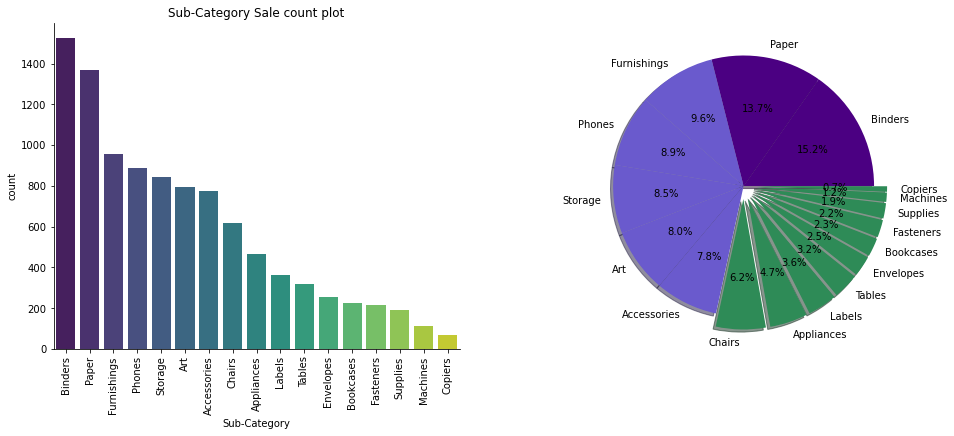

In [370]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x='Sub-Category',data=data,order=data['Sub-Category'].value_counts().index,palette='viridis')
plt.title('Sub-Category Sale count plot')
plt.xticks(rotation=90)
sns.despine()

subcategorycounts=data['Sub-Category'].value_counts()
plt.subplot(1,2,2)
plt.pie(subcategorycounts,labels=subcategorycounts.index,shadow=True,colors=['indigo','indigo','slateblue','slateblue','slateblue','slateblue','slateblue','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen','seagreen'],explode=[0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%')

>From above plots we understand that most sold items are **Binders and Papers**. Following which, with a little less, but signifant sales are, **Furnishings, Phones, Storages, Art, Accesories**.

#### State

In [230]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

Text(0.5, 1.0, 'State sale count')

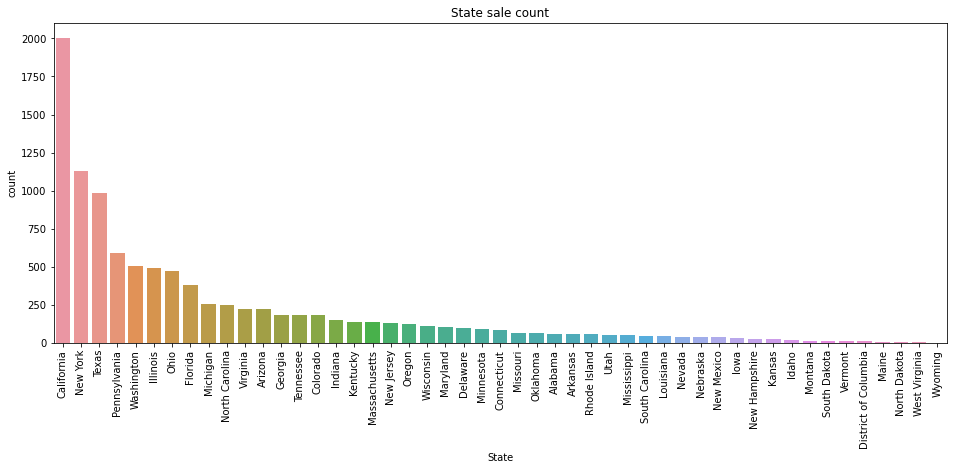

In [543]:
plt.figure(figsize=(16,20))
plt.subplot(3,1,1)
sns.countplot(x='State',data=data,order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('State sale count')

>From above 2 graphs we can see that California, New York, Texas, Washington and Pensyllvanisa have our most potential buyers, as well as are our highest revenue generator states.

---
### EDA - Categorical Sales vs Profit 

#### Customer Segment


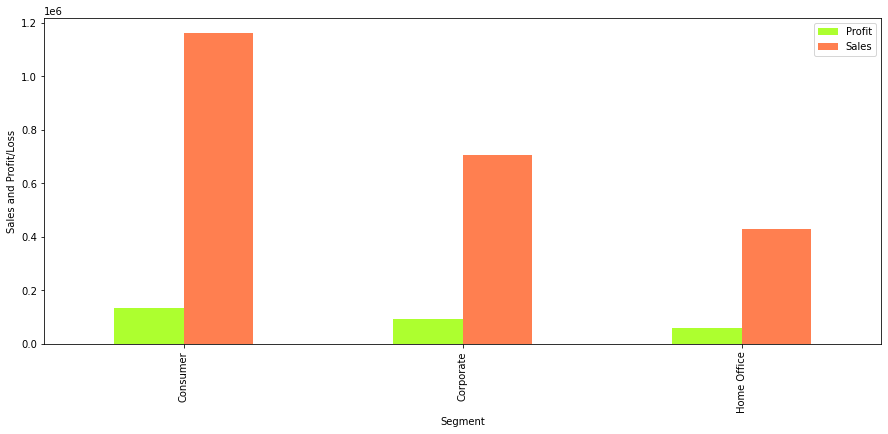

In [526]:
data.groupby('Segment')[['Profit','Sales']].sum().plot(kind='bar',color=['greenyellow','coral'],figsize=(15,6))
plt.ylabel('Sales and Profit/Loss')
plt.legend()

> In all Segments, Sales and Profits are directly correlated.

#### Region

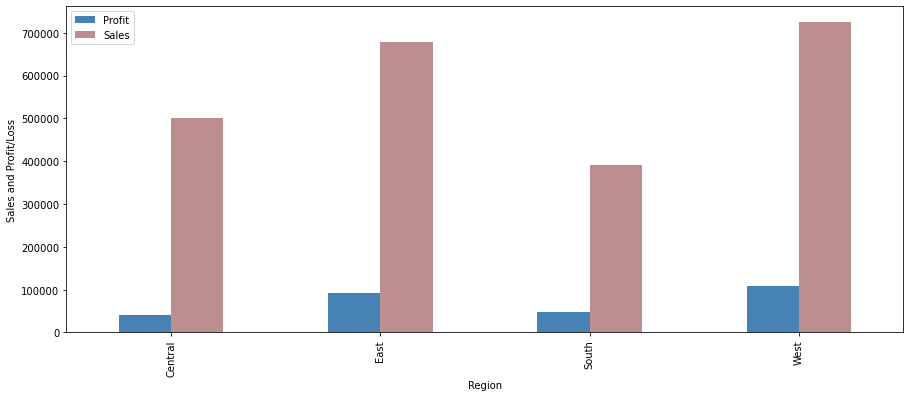

In [534]:
data.groupby('Region')[['Profit','Sales']].sum().plot(kind='bar',color=['steelblue','rosybrown'],figsize=(15,6))
plt.ylabel('Sales and Profit/Loss')
plt.legend()

> In all Regions, Sales and Profits directly correlated.

#### Product Category

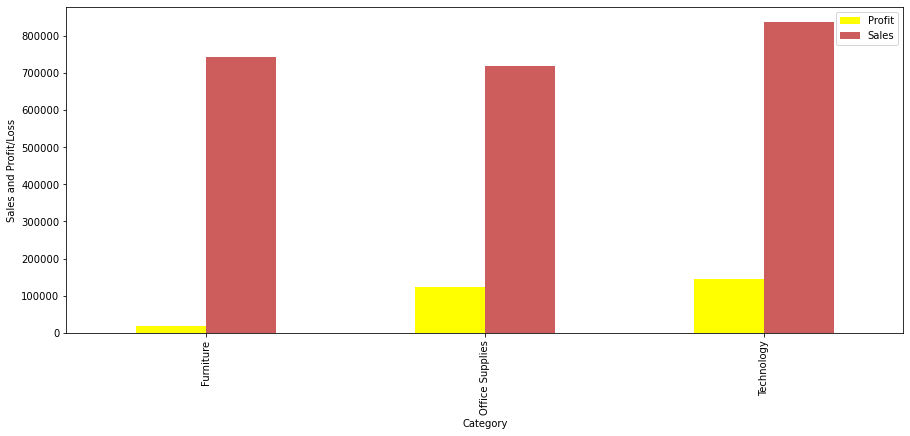

In [535]:
data.groupby('Category')[['Profit','Sales']].sum().plot(kind='bar',color=['yellow','indianred'],figsize=(15,6))
plt.ylabel('Sales and Profit/Loss')

plt.legend()

> For all Product Categories, Sales and Profits are directly correlated.

#### Product Sub-Category

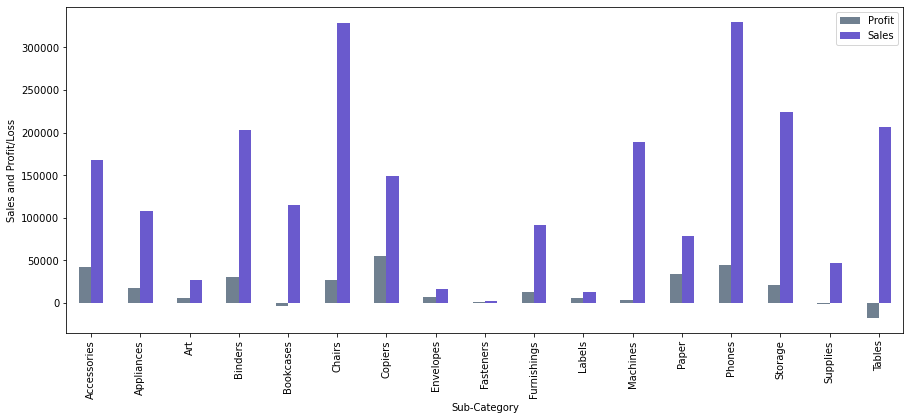

In [541]:
data.groupby('Sub-Category')[['Profit','Sales']].sum().plot(kind='bar',color=['slategrey','slateblue'],figsize=(15,6))
plt.ylabel('Sales and Profit/Loss')
plt.legend()

>- In all Product Sub-categories, Sales and Profits are directly correlated except for Bookcases, and Tables.
>- For Bookcases and Tables, we are running in loss.

#### State

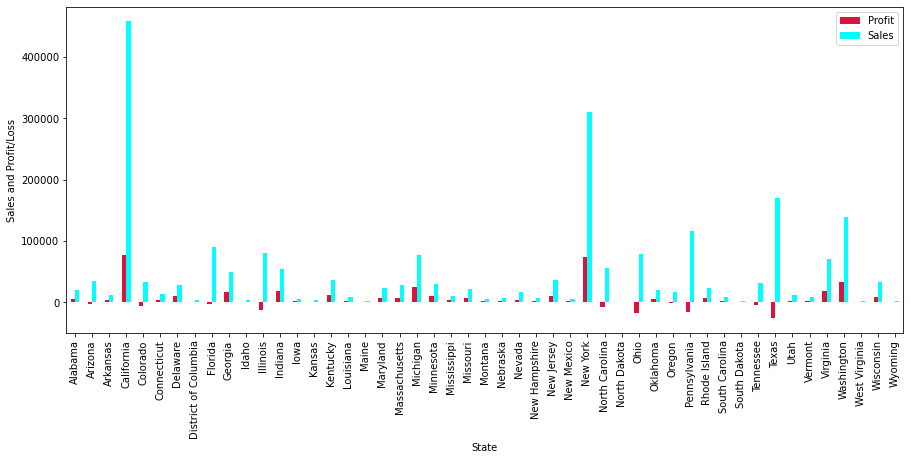

In [539]:
data.groupby('State')[['Profit','Sales']].sum().plot(kind='bar',color=['crimson','cyan'],figsize=(15,6))
plt.ylabel('Sales and Profit/Loss')
plt.legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

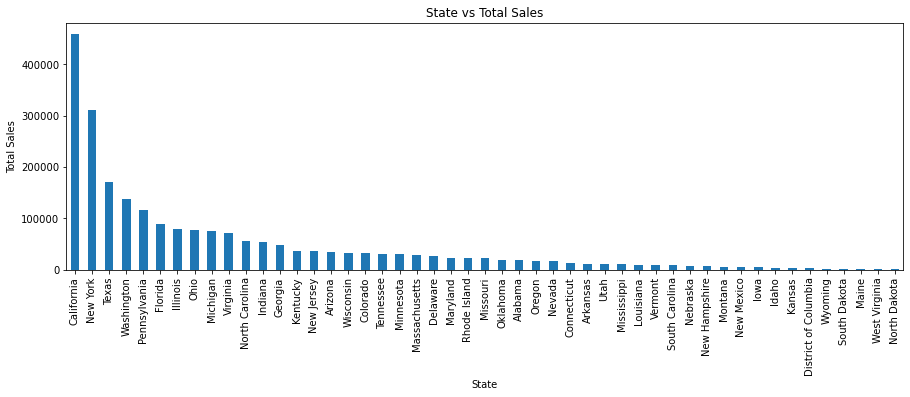

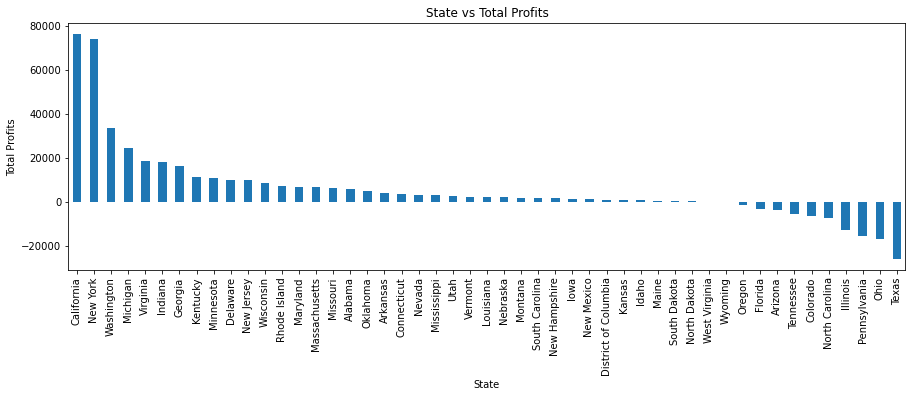

In [547]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
data.groupby('State').Sales.sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Sales')
plt.title('State vs Total Sales')
plt.xticks(rotation=90)

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
data.groupby('State').Profit.sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total Profits')
plt.title('State vs Total Profits')
plt.xticks(rotation=90)

>- In most States, Sales and Profits are directly correlated.
>- However, Texas, Ohio, Pennsylvania, Illinoise, North Carolina, Colorado, Tenessee, Arizona, Florida, Oregon are running in loss.

--------
### EDA - Region Based

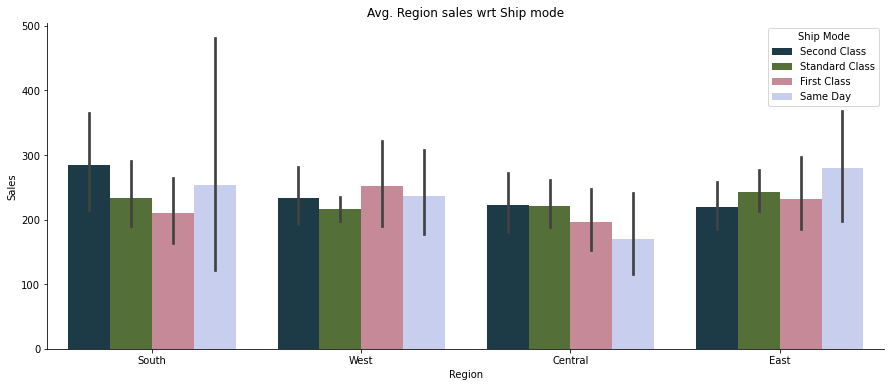

In [453]:
plt.figure(figsize=(15,6))
sns.barplot(x='Region',y='Sales',data=data,palette='cubehelix',hue='Ship Mode')
plt.title('Avg. Region sales wrt Ship mode')
sns.despine()

>- In South region sales are higher for second class ship mode.
>- In West region sales are higher for First class ship mode, however there isn't much difference when compared with other ship modes.
>-In Central region customers sales are high for Second class and Standard class ship mode, followed by First class and Same day ship mode respectively.
>- On a contrary to all other regions, in East region customer sales are high for Same day ship mode.

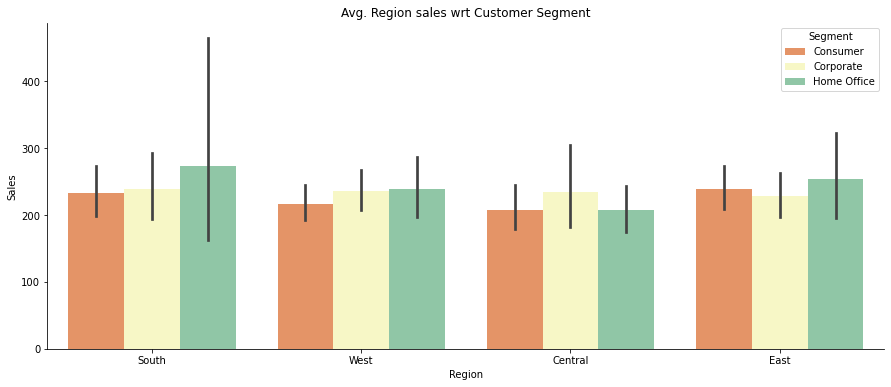

In [454]:
plt.figure(figsize=(15,6))
sns.barplot(x='Region',y='Sales',data=data,palette='Spectral',hue='Segment')
plt.title('Avg. Region sales wrt Customer Segment')
sns.despine()

>- In all regions our sales are higher in home office buyers, however in Central region we see that we have more sales with corporate buyers.

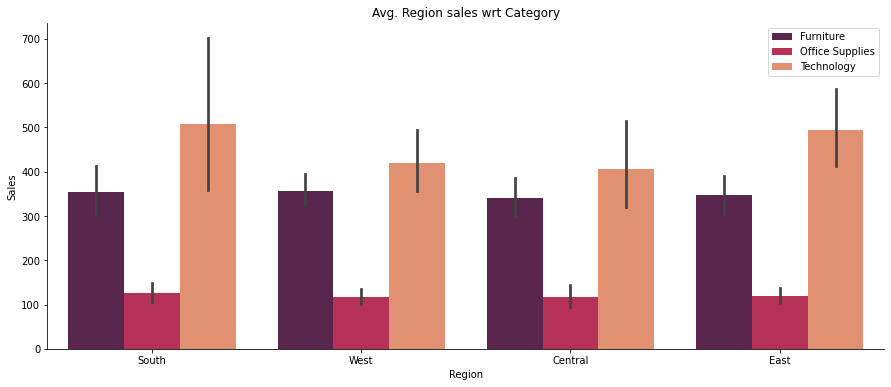

In [455]:
plt.figure(figsize=(15,6))
sns.barplot(x='Region',y='Sales',data=data,palette='rocket',hue='Category')
plt.title('Avg. Region sales wrt Category')
sns.despine()
plt.legend()

>- We see a trend here that irrespective of regions, our highest sales lie in technology category followed by furniture.
>- We also see that sales in office supplies is significantly low when compared to other categories.


----
### EDA - Segment Based

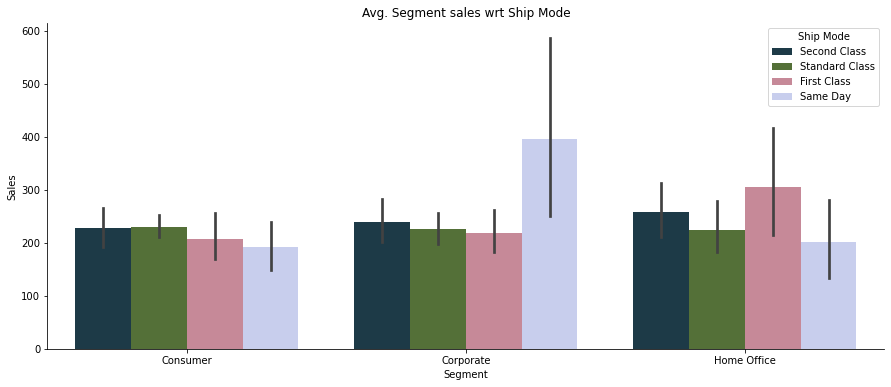

In [456]:
plt.figure(figsize=(15,6))
sns.barplot(x='Segment',y='Sales',data=data,palette='cubehelix',hue='Ship Mode')
plt.title('Avg. Segment sales wrt Ship Mode')
sns.despine()

>- Consumer sales are high with Standard or Second class ship mode.
>- For Corporate segment, we see significant preference for Same day ship mode.
>- Home office buyers do not have high sales for same day ship mode, rather they prefer First class ship mode.

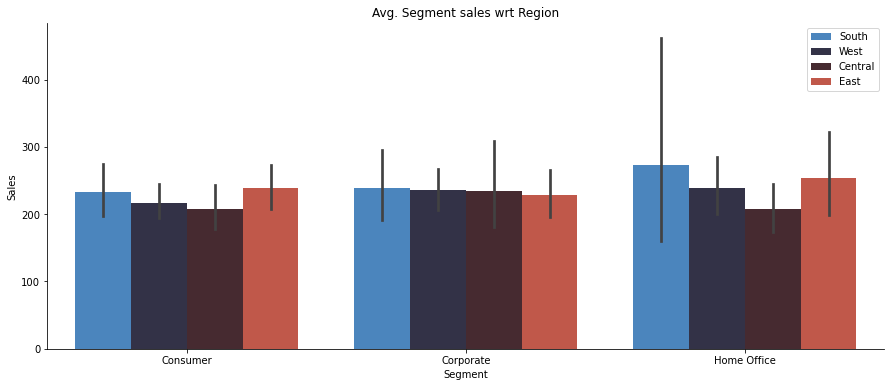

In [457]:
plt.figure(figsize=(15,6))
sns.barplot(x='Segment',y='Sales',data=data,palette='icefire',hue='Region')
plt.title('Avg. Segment sales wrt Region')
sns.despine()
plt.legend()

>- For Consumer and Home office segment, South and East region are most revenue generators.
>- However, for Corporate segment all regions contribute neck to neck to our revenue.

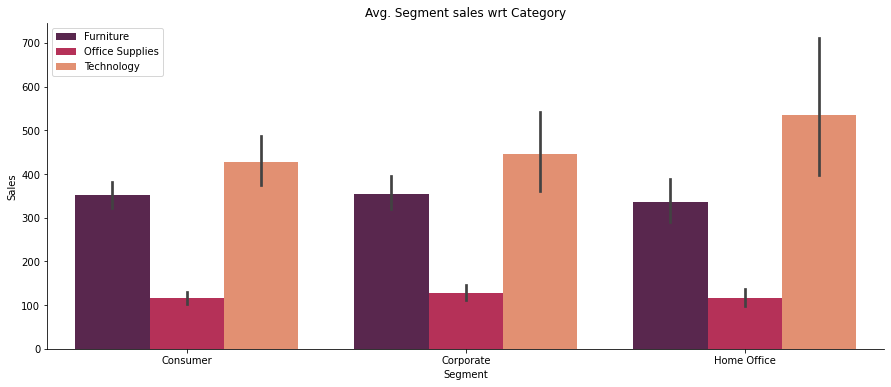

In [458]:
plt.figure(figsize=(15,6))
sns.barplot(x='Segment',y='Sales',data=data,palette='rocket',hue='Category')
plt.title('Avg. Segment sales wrt Category')
sns.despine()
plt.legend()

>- We again see a trend that sales are higher for technology items irrespective of customer segment, followed by furniture and then significant low for office supplies.

---
### EDA - Product Category Based

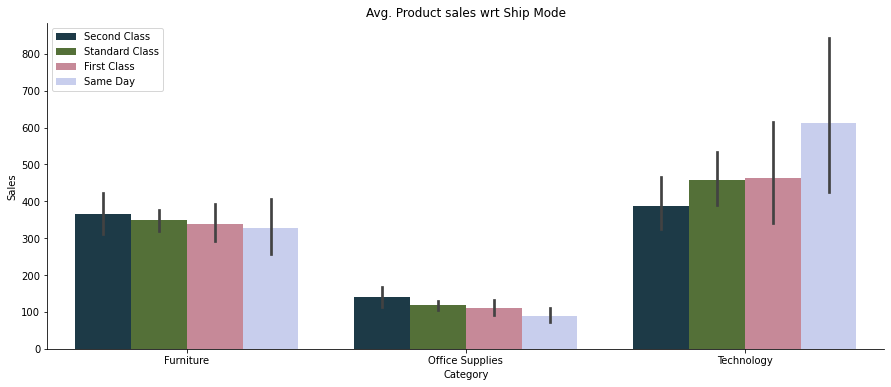

In [445]:
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Sales',data=data,palette='cubehelix',hue='Ship Mode')
plt.title('Avg. Product sales wrt Ship Mode')
sns.despine()
plt.legend()

>- For Furniture and Office supplies sales are higher for Second class ship mode.
>- When it comes to Technology products, customers prefer same day ship mode.

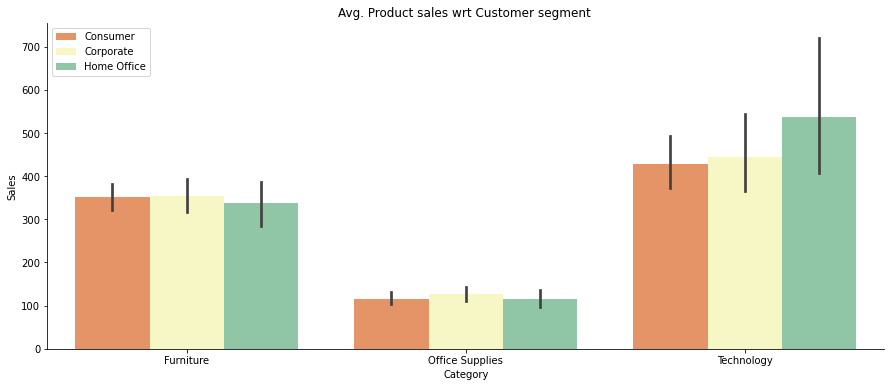

In [446]:
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Sales',data=data,palette='Spectral',hue='Segment')
plt.title('Avg. Product sales wrt Customer segment ')
sns.despine()
plt.legend()

>- For Furniture and Office supplies all customer segments have similar sales.
>- However when it comes to Technology products, sales in Home office is higher followed by Corporate and least in consumer segment.

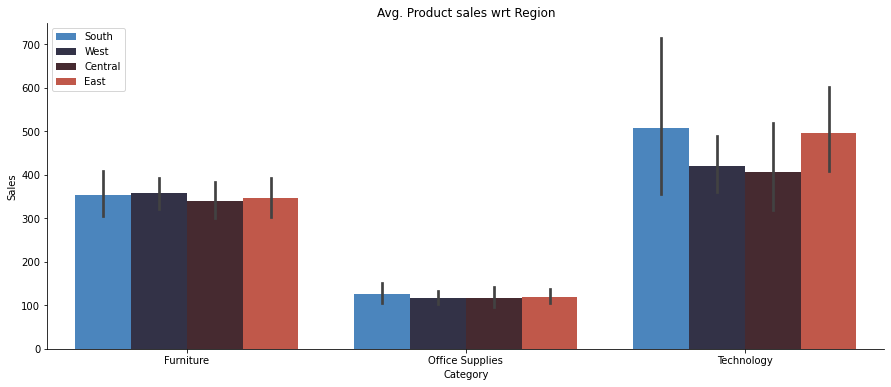

In [447]:
plt.figure(figsize=(15,6))
sns.barplot(x='Category',y='Sales',data=data,palette='icefire',hue='Region')
plt.title('Avg. Product sales wrt Region')
sns.despine()
plt.legend()

>- Again for Furniture and Office products, all regions have neck to neck sales.
>- However for Technology products, South and East region are high revenue generators.

##### Key Points:

>- Quantity and sales are directly correlated. 
- Sales and Profits are directly correlated.
- Discounts and quanity of sales is directly correlated.
- However, when it comes to Discounts with Sales and Profits, they are negatively correlated

>- Highest number of customers opt for Standard class ship mode, least number of customers opt for same day ship mode.
- Our most potential buyers are Consumers over Corporate and Home office buyers. Also that is where our sales and profits are high.
- West and East region considerably contribute to our sales. We need to work on South region to increase our revenue.
- Although our most sold products by quantity are office supplies, tech products generate the most revenue and profits .
- Binders and Papers have the highest sale quantity. However, when it comes to sales and profits, Phones and Chairs give the most to our business when considerng Sub-Category products.
- California and New York are the highest order generators for our business and in most states Sales are positively correlated to Profits. But in Texas, Ohio, Pennsylvania, Illinoise, North Carolina, Colorado, Tenessee, Arizona, Florida, Oregon are running in loss.

>- In all regions Home Office buyers contribute the most to our sales. But in Central region, Corporate buyers generate the highest revenue.

>- Consumer sales are high with Standard or Second class ship mode.
- Corporate buyers prefer same day ship mode.
- Home office buyers prefer First class ship mode.


---
##### The End